In [ ]:
# PROVA 1 ANÀLISI DE DADES PCA

In [66]:
# Importem les biblioteques necessàries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [76]:
#Carreguem dades
rnaseq_un = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/unproc_rnaseq.csv')
pbrna_beta_un = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/unproc_pbrna_Beta.csv')
pbrna_alpha_un = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/unproc_pbrna_Alpha.csv')
rnaseq_p = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/proc_rnaseq.csv')
pbrna_beta_p = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/proc_pbrna_Beta.csv')
pbrna_alpha_p = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/proc_pbrna_Alpha.csv')
donor_data = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/donor.csv')


In [120]:
#Tractament de dades sense funció 

pbrna_beta_un = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/unproc_pbrna_Beta.csv')
donor_data = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/donor.csv')
pbrna_beta_un.set_index("feature_id", inplace=True)
pbrna_beta_un_t = pbrna_beta_un.T

pbrna_beta_un_t.index.name = "record_id"

merged_data = pbrna_beta_un_t.merge(
    donor_data[["record_id", "diagnosis"]],  
    on="record_id",                           
    how="left"                                
)

merged_data.rename(columns={"diagnosis": "Condició"}, inplace=True)
merged_data["Condició"].fillna("sa", inplace=True)
merged_data.set_index('record_id', inplace=True)






/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_1672/370467256.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data["Condició"].fillna("sa", inplace=True)


In [121]:
#FUNCIO TRACTAMENT DADES INICIALS 

import pandas as pd

def process_pbrna_data(pbrna_file_path, donor_file_path, diagnosis_col="diagnosis", condition_col="Condició", default_condition="sa"):

    pbrna_beta_un = pd.read_csv(pbrna_file_path)
    donor_data = pd.read_csv(donor_file_path)
    
    # Estableix 'feature_id' com a índex i transposa el DataFrame
    pbrna_beta_un.set_index("feature_id", inplace=True)
    pbrna_beta_un_t = pbrna_beta_un.T
    pbrna_beta_un_t.index.name = "record_id"

    # Combina les dades amb la informació de diagnòstic
    merged_data = pbrna_beta_un_t.merge(
        donor_data[["record_id", diagnosis_col]],  
        on="record_id",                           
        how="left"                                
    )

    merged_data.rename(columns={diagnosis_col: condition_col}, inplace=True)
    merged_data[condition_col].fillna("SA", inplace=True)
    merged_data.set_index('record_id', inplace=True)

    return merged_data


In [122]:
# BETA UNPROC
beta_unp = process_pbrna_data(
    pbrna_file_path='/Users/carlabatlle/Documents/practiques/data/unproc_pbrna_Beta.csv',
    donor_file_path='/Users/carlabatlle/Documents/practiques/data/donor.csv'
)

/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_1672/3306132203.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[condition_col].fillna("SA", inplace=True)


In [124]:
#ALPHA UNPROC
alpha_unp = process_pbrna_data(
    pbrna_file_path='/Users/carlabatlle/Documents/practiques/data/unproc_pbrna_Alpha.csv',
    donor_file_path='/Users/carlabatlle/Documents/practiques/data/donor.csv'
)

/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_1672/3306132203.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[condition_col].fillna("SA", inplace=True)


In [125]:
#RNAseq UNPROC
RNAseq_unp = process_pbrna_data(
    pbrna_file_path='/Users/carlabatlle/Documents/practiques/data/unproc_rnaseq.csv',
    donor_file_path='/Users/carlabatlle/Documents/practiques/data/donor.csv'
)

/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_1672/3306132203.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[condition_col].fillna("SA", inplace=True)


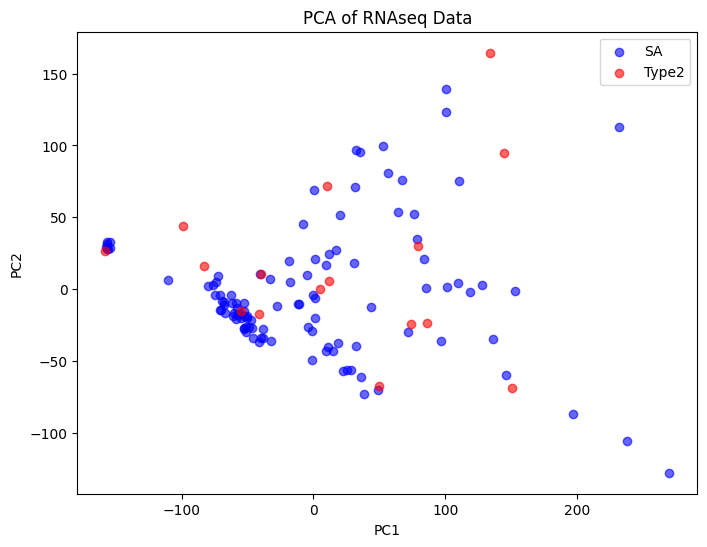

[0.36529807 0.11290312]


In [148]:
# PCA RNAseq UNPROC

rnaseq_unp_numeric = RNAseq_unp.drop(columns=["Condició"])  
scaler = StandardScaler()
rnaseq_unp_scaled = scaler.fit_transform(rnaseq_unp_numeric)  


pca = PCA(n_components=2)
pca_result = pca.fit_transform(rnaseq_unp_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Condició"] = RNAseq_unp["Condició"].values  

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df["Condició"] == "SA"]["PC1"], pca_df[pca_df["Condició"] == "SA"]["PC2"], label="SA", color='blue', alpha=0.6)
plt.scatter(pca_df[pca_df["Condició"] == "Type2"]["PC1"], pca_df[pca_df["Condició"] == "Type2"]["PC2"], label="Type2", color='red', alpha=0.6)

# Customize the plot
plt.title("PCA of RNAseq Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

print(pca.explained_variance_ratio_)

In [152]:
def process_pbrna_data_proc(pbrna_file_path, donor_file_path, diagnosis_col="diagnosis", condition_col="Condició", default_condition="sa"):

    pbrna_beta_un = pd.read_csv(pbrna_file_path)
    donor_data = pd.read_csv(donor_file_path)
    
    # Estableix 'feature_id' com a índex i transposa el DataFrame
    pbrna_beta_un.set_index("gene_id", inplace=True)
    pbrna_beta_un_t = pbrna_beta_un.T
    pbrna_beta_un_t.index.name = "record_id"

    # Combina les dades amb la informació de diagnòstic
    merged_data = pbrna_beta_un_t.merge(
        donor_data[["record_id", diagnosis_col]],  
        on="record_id",                           
        how="left"                                
    )

    merged_data.rename(columns={diagnosis_col: condition_col}, inplace=True)
    merged_data[condition_col].fillna("SA", inplace=True)
    merged_data.set_index('record_id', inplace=True)

    return merged_data

In [153]:
#RNAseq PROC
RNAseq_proc = process_pbrna_data_proc(
    pbrna_file_path='/Users/carlabatlle/Documents/practiques/data/proc_rnaseq.csv',
    donor_file_path='/Users/carlabatlle/Documents/practiques/data/donor.csv'
)

/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_1672/2143923770.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[condition_col].fillna("SA", inplace=True)


In [170]:
missing_values_count = RNAseq_proc.isnull().sum().sum()
missing_values_count


np.int64(149461)

In [ ]:
rnaseq_proc_scaled_clean = RNAseq_proc.dropna(axis=1) #eliminar missing values (columes)

In [ ]:
rnaseq_proc_scaled_clean.shape 

(117, 9444)

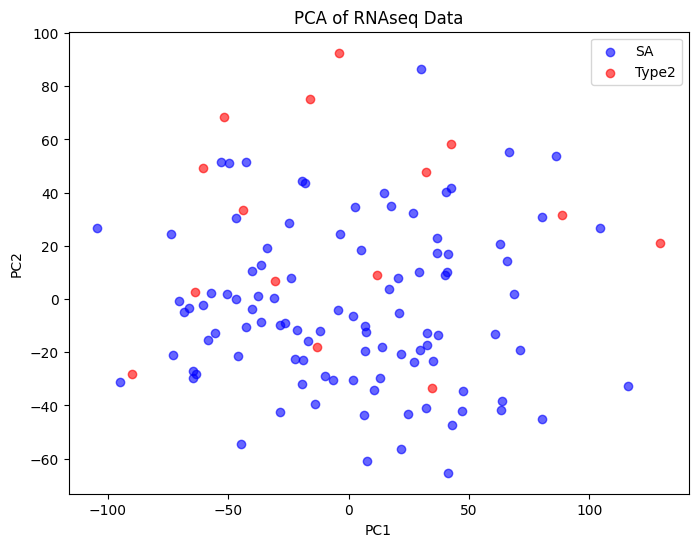

[0.24378588 0.11314326]


In [178]:
#PCA RNAseq PROC
# PCA RNAseq UNPROC

rnaseq_unp_numeric = rnaseq_proc_scaled_clean.drop(columns=["Condició"])  
scaler = StandardScaler()
rnaseq_unp_scaled = scaler.fit_transform(rnaseq_unp_numeric)  


pca = PCA(n_components=2)
pca_result = pca.fit_transform(rnaseq_unp_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Condició"] = rnaseq_proc_scaled_clean["Condició"].values  

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df["Condició"] == "SA"]["PC1"], pca_df[pca_df["Condició"] == "SA"]["PC2"], label="SA", color='blue', alpha=0.6)
plt.scatter(pca_df[pca_df["Condició"] == "Type2"]["PC1"], pca_df[pca_df["Condició"] == "Type2"]["PC2"], label="Type2", color='red', alpha=0.6)

# Customize the plot
plt.title("PCA of RNAseq Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

print(pca.explained_variance_ratio_)

